In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from sklearn.linear_model import LogisticRegression
from six.moves import cPickle as pickle
from sklearn.datasets import load_iris
%matplotlib inline

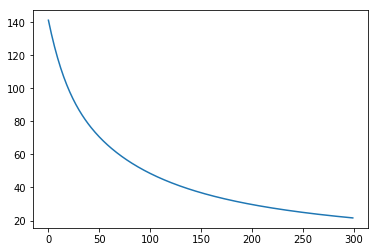

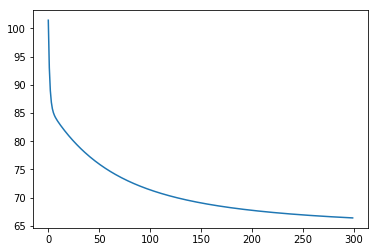

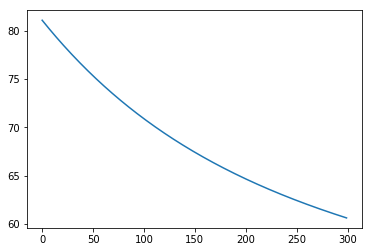

The accuracy of the model is of 80.0%


In [3]:
def gro(x):
    if x<0.5:
        return 0
    else:
        return 1
 
#sigmoid function
def sig(x):
    return 1/(1+np.exp(-x))
 
 
#hypothesis function
def hy(theta,x):
    return sig(theta.dot(x))
 
#given a dataset X we can create the vextor of hypothesis
def vec_hy(theta,X):
    l = [hy(theta, X[i]) for i in range(len(X))]
    return np.array(l)
 
# - log likelyhood function 
def error(theta,X,y):
    l = [(y[i]*np.log(hy(theta,X[i]))) +
((1-y[i])*np.log(1-hy(theta,X[i]))) for i in range(len(y))]
    return -np.sum(np.array(l))
 
# partial derivative
def del_e_del_j(j,theta,X,y):
    return (X.T[j]).dot(vec_hy(theta,X)-y)
 
 
def gra_fixed(alpha,times,theta,X,y):
    init = theta
    graf = []
    for i in range(times):
        for j in range(len(theta)):
            init[j] = init[j] - alpha*del_e_del_j(j,theta,X,y)
        theta = init
        graf.append(error(theta,X,y))
     
    plt.plot(range(times),graf)
    plt.show()
    return theta
 
 
def gra_mut1(alpha,times,theta,X,y):
    init = theta
    graf = []
    for i in range(times):
        alpha = alpha*0.66
        for j in range(len(theta)):
            init[j] = init[j] - alpha*del_e_del_j(j,theta,X,y)
        theta = init
        graf.append(error(theta,X,y))
     
    plt.plot(range(times),graf)
    plt.show()
    return theta
 
 
def gra_mut2(alpha,times,theta,X,y):
    init = theta
    graf = []
    for i in range(times):
        alpha = alpha*0.5
        for j in range(len(theta)):
            init[j] = init[j] - alpha*del_e_del_j(j,theta,X,y)
        theta = init
        graf.append(error(theta,X,y))
     
    plt.plot(range(times),graf)
    plt.show()
    return theta
 
 
def compair(theta,X,y):
    l = np.array([gro(i) for i in vec_hy(par,X)])
    cont = 0
    for i in range(len(l)):
        if l[i]==y[i]:
            cont = cont+1
 
    print('The accuracy of the model is of {}%'.format((cont/len(l))*100))
 
 
iris = load_iris()
 
def only_setosa(x):
    if x==0:
        return 1
    else:
        return 0
 
def only_versicolor(x):
    if x==1:
        return 1
    else:
        return 0
 
def only_virginica(x):
    if x==2:
        return 1
    else:
        return 0 
 
def normalize(Xdata):
    l=[]
    for i in range(len(Xdata.T)):
        l.append(np.array([(j - (np.sum(Xdata.T[i]))/len(Xdata.T[i]))/\
            (max(Xdata.T[i]) - min(Xdata.T[i])) for j in Xdata.T[i]]))
    return np.array(l).T    
     
     
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation]
  shuffled_labels = labels[permutation]
  print(permutation.shape, len(permutation))
  return shuffled_dataset, shuffled_labels
 
 
def randomize_in_place(list1,list2, init):
    np.random.seed(seed=init)
    np.random.shuffle(list1)
    np.random.seed(seed=init)
    np.random.shuffle(list2)
         
qX = normalize(iris['data'])
allX = np.array(np.insert(qX, 0, 1, axis=1))
ally = iris['target']
randomize_in_place(allX, ally,0)
 
ally_se = np.array([only_setosa(i) for i in ally])    
ally_ve = np.array([only_versicolor(i) for i in ally])    
ally_vi = np.array([only_virginica(i) for i in ally])    
    
 
X = allX[:131]
tX = allX[-20:]
y_se = ally_se[:131]
y_ve = ally_ve[:131]
y_vi = ally_vi[:131]
ty = ally[-20:]
 
par_se = np.random.random_sample((5,))
gra_fixed(0.001,300,par_se,X,y_se)
par_ve = np.random.random_sample((5,))
gra_fixed(0.01,300,par_ve,X,y_ve)
par_vi = np.random.random_sample((5,))
gra_fixed(0.0001,300,par_vi,X,y_vi)
 
 
hy_0 = vec_hy(par_se,tX)
hy_1 = vec_hy(par_ve,tX)
hy_2 = vec_hy(par_vi,tX)
 
 
l = []
for i in range(len(hy_0)):
    l.append(max([hy_0[i],hy_1[i],hy_2[i]]))
 
ll=[]    
for i in range(len(hy_0)):
    if l[i]==hy_0[i]:
        ll.append(0)
    elif l[i]==hy_1[i]:
        ll.append(1)
    elif l[i]==hy_2[i]:
        ll.append(2)
         
cont = 0
for i in range(len(ll)):
    if ll[i]==ty[i]:
        cont = cont+1
 
print('The accuracy of the model is of {}%'.format((cont/len(l))*100))